# COVID-19 Data Analysis

This notebook is a placeholder for initial data analysis of COVID-19 data. There are many data sources, which all have different levels of detail. [This website](https://ourworldindata.org/covid-sources-comparison) produces a comparison of World Health Organisation (WHO) and European Centre for Disease Prevention and Control (ECDC). But even within the ECDC data, there are global and "enhanced" data.

## TODO:
- Segment countries. Attempt to figure out which countries are representative
- Generate analysis plots
- Look at other datasets
- Start asking questions

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

## Initial look at global ECDC data

This section investigates the global EDCD data.

In [0]:
df = pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/", parse_dates=["dateRep"], infer_datetime_format=True, dayfirst=True)
df = df.rename(columns={'dateRep': 'date', 'countriesAndTerritories': 'country'}) # Sane column names
df = df.drop(["day", "month", "year", "geoId"], axis=1) # Not required

In [3]:
df

date  cases  deaths      country countryterritoryCode  popData2018
0    2020-04-06     29       2  Afghanistan                  AFG   37172386.0
1    2020-04-05     35       1  Afghanistan                  AFG   37172386.0
2    2020-04-04      0       0  Afghanistan                  AFG   37172386.0
3    2020-04-03     43       0  Afghanistan                  AFG   37172386.0
4    2020-04-02     26       0  Afghanistan                  AFG   37172386.0
...         ...    ...     ...          ...                  ...          ...
9102 2020-03-25      0       0     Zimbabwe                  ZWE   14439018.0
9103 2020-03-24      0       1     Zimbabwe                  ZWE   14439018.0
9104 2020-03-23      0       0     Zimbabwe                  ZWE   14439018.0
9105 2020-03-22      1       0     Zimbabwe                  ZWE   14439018.0
9106 2020-03-21      1       0     Zimbabwe                  ZWE   14439018.0

[9107 rows x 6 columns]

In [4]:
df["country"].unique()

array(['Afghanistan', 'Albania', 'Andorra', 'Algeria', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea

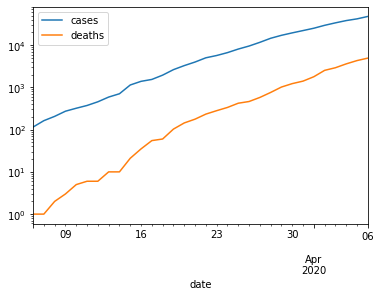

In [5]:
# Filter for country (probably want separate models per country, even maybe per region)
country = df[df["country"] == "United_Kingdom"].sort_values(by="date")
# Cumulative sum of data
country_cumsum = country[["cases", "deaths"]].cumsum().set_index(country["date"])
# Filter out data with less than 100 cases
country_cumsum = country_cumsum[country_cumsum["cases"] >= 100]
country_cumsum.plot(logy=True)
plt.show()